In [6]:
import numpy as np
import matplotlib.pyplot as plt

Num = int(1e5)
Iternum = 10000
x = np.zeros(Num)
y = np.zeros(Num)
history = np.zeros((Iternum, 2))
x1 = np.zeros(Num)
randhistory = np.zeros(Iternum)

In [7]:
for i in range(Iternum):
    randx = np.random.randint(2, size=Num) * 2 - 1
    randy = np.random.randint(2, size=Num) * 2 - 1
    aval = y == 0
    x[aval] += randx[aval]
    y += randy
    history[i, 0] = np.mean(np.abs(x))
    history[i, 1] = np.mean(np.abs(y))

    x1 += randx
    randhistory[i] = np.mean(np.abs(x1))

/tmp/ipykernel_244912/1261962996.py:4: RuntimeWarning: divide by zero encountered in log10
  logt = np.log10(t)


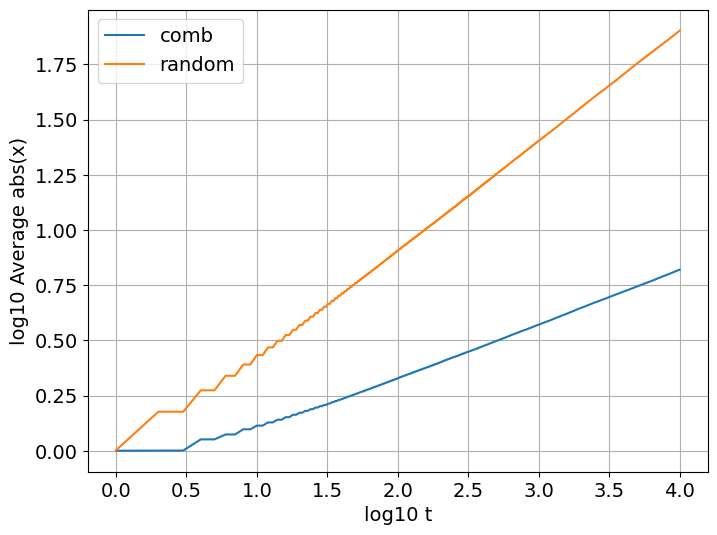

In [8]:
# average abs(x) over t
t = np.arange(Iternum)

logt = np.log10(t)
logcomb = np.log10(history[:, 0])
logrand = np.log10(randhistory)

fig = plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.tight_layout(pad=5)
# plt.plot(t, history[:, 0], label='comb')
plt.plot(logt, logcomb, label='comb')
plt.plot(logt, logrand, label='random')
# plt.plot(t, randhistory, label='normal')
# plt.plot(t, avex[:, 1], label='y')
plt.xlabel('log10 t')
plt.ylabel('log10 Average abs(x)')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [12]:
# fit the plot
idx0 = 1000
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(logt[idx0:], logcomb[idx0:])
print(f'slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}')
slope, intercept, r_value, p_value, std_err = stats.linregress(logt[idx0:], logrand[idx0:])
print(f'slope: {slope}, intercept: {intercept}, r_value: {r_value}, p_value: {p_value}, std_err: {std_err}')

slope: 0.24726228025508645, intercept: -0.17007307008078731, r_value: 0.9999674739313291, p_value: 0.0, std_err: 2.102452803079607e-05
slope: 0.4979086278295755, intercept: -0.08904645853610038, r_value: 0.9999763915406693, p_value: 0.0, std_err: 3.606892246809426e-05
